<a href="https://colab.research.google.com/github/avinashdhakne/Covid-19-Information-Chatbot-using-Deep-learning/blob/main/Oil_Pipeline_Accidents_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

!pip install chart_studio
import chart_studio
chart_studio.tools.set_credentials_file(username='AvinashDhakne', api_key='Dv43js8wdsL7C8U44wUm')

import chart_studio.plotly as py
import chart_studio.tools as tls

In [24]:
data = pd.read_csv("/content/drive/MyDrive/Semester 4/Project/HackIllinois 2022/database.csv", parse_dates = ["Accident Date/Time"], index_col = "Accident Date/Time")
data.head()

,Report Number,Supplemental Number,Accident Year,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,Liquid Subtype,Liquid Name,Accident City,Accident County,Accident State,Accident Latitude,Accident Longitude,Cause Category,Cause Subcategory,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Shutdown Date/Time,Restart Date/Time,Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
Accident Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01 07:15:00,20100016,17305,2010,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",LPG (LIQUEFIED PETROLEUM GAS) / NGL (NATURAL G...,NaN,MCPHERSON,MCPHERSON,KS,38.67070,-97.78123,INCORRECT OPERATION,PIPELINE/EQUIPMENT OVERPRESSURED,21.00,0.1,0.00,21.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
2010-01-04 08:30:00,20100254,17331,2010,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,NaN,NaN,RAYMOND,CUMBERLAND,ME,43.94028,-70.49336,MATERIAL/WELD/EQUIP FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,0.12,0.0,0.12,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2010-01-05 10:30:00,20100038,17747,2010,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",OTHER HVL,ETHANE,SULPHER,CALCASIEU,LA,30.18240,-93.35240,MATERIAL/WELD/EQUIP FAILURE,DEFECTIVE OR LOOSE TUBING/FITTING,2.00,0.0,0.00,2.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
2010-01-06 19:30:00,20100260,18574,2010,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SUPERIOR,DOUGLAS,WI,46.68930,-92.06120,NATURAL FORCE DAMAGE,TEMPERATURE,0.48,0.0,0.48,0.0,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
2010-01-07 13:00:00,20100030,16276,2010,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,NaN,NaN,SHERMAN,GRAYSON,TX,33.58266,-96.64881,EXCAVATION DAMAGE,THIRD PARTY EXCAVATION DAMAGE,700.00,NaN,698.00,2.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [25]:
data.describe()

,Report Number,Supplemental Number,Accident Year,Operator ID,Accident Latitude,Accident Longitude,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Public Evacuations,Operator Employee Injuries,Operator Contractor Injuries,Emergency Responder Injuries,Other Injuries,Public Injuries,All Injuries,Operator Employee Fatalities,Operator Contractor Fatalities,Emergency Responder Fatalities,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
count,2.795000e+03,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,1209.000000,2795.000000,2795.000000,2338.000000,12.000000,12.0000,12.0,12.0,12.000000,12.000000,8.0,8.000000,8.0,8.000000,8.000000,8.00000,2.788000e+03,2.791000e+03,2.785000e+03,2.789000e+03,2.787000e+03,2.779000e+03,2.795000e+03
mean,2.013293e+07,19433.319499,2013.187835,21388.476565,35.781608,-95.682691,207.245843,238.533623,75.051792,132.194050,0.964072,0.250000,1.0000,0.0,0.0,0.416667,1.666667,0.0,0.500000,0.0,0.125000,0.625000,1.25000,1.122963e+05,9.805299e+03,2.512195e+04,2.918911e+05,3.628094e+05,3.435604e+04,8.340332e+05
std,1.982098e+04,1724.815370,1.972102,12430.973428,5.652599,12.328430,1368.667813,2781.771453,546.188247,1185.019252,18.151398,0.452267,1.3484,0.0,0.0,0.900337,1.073087,0.0,0.755929,0.0,0.353553,0.744024,0.46291,8.709947e+05,6.384075e+04,5.243581e+05,4.617076e+06,1.206887e+07,6.191235e+05,1.657830e+07
min,2.010000e+07,15072.000000,2010.000000,300.000000,18.448010,-158.099930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.012004e+07,17978.500000,2012.000000,11169.000000,30.909375,-100.587636,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,1.00000,1.000000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.039500e+03
50%,2.013037e+07,19502.000000,2013.000000,26041.000000,34.925440,-95.488870,2.000000,0.000000,0.740000,0.000000,0.000000,0.000000,0.5000,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.500000,1.00000,3.000000e+03,1.000000e+02,0.000000e+00,2.520000e+03,8.000000e+02,0.000000e+00,2.312900e+04
75%,2.015023e+07,20996.500000,2015.000000,31618.000000,40.264062,-91.089463,20.000000,0.000000,8.000000,2.000000,0.000000,0.250000,1.2500,0.0,0.0,0.250000,2.250000,0.0,1.000000,0.0,0.000000,1.000000,1.25000,2.500000e+04,7.000000e+02,0.000000e+00,1.550000e+04,1.500000e+04,0.000000e+00,1.172325e+05
max,2.017003e+07,22049.000000,2017.000000,99043.000000,70.261265,104.263399,30565.000000,70191.000000,18245.000000,30565.000000,700.000000,1.000000,4.0000,0.0,0.0,3.000000,4.000000,0.0,2.000000,0.0,1.000000,2.000000,2.00000,2.700000e+07,1.417839e+06,2.300000e+07,1.770000e+08,6.350000e+08,2.235000e+07,8.405261e+08


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2795 entries, 2010-01-01 07:15:00 to 2017-01-09 07:40:00
Data columns (total 47 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Operator ID                           2795 non-null   int64  
 4   Operator Name                         2795 non-null   object 
 5   Pipeline/Facility Name                2674 non-null   object 
 6   Pipeline Location                     2795 non-null   object 
 7   Pipeline Type                         2777 non-null   object 
 8   Liquid Type                           2795 non-null   object 
 9   Liquid Subtype                        1349 non-null   object 
 10  Liquid Name                           222 non-nu

# Data Analysis 

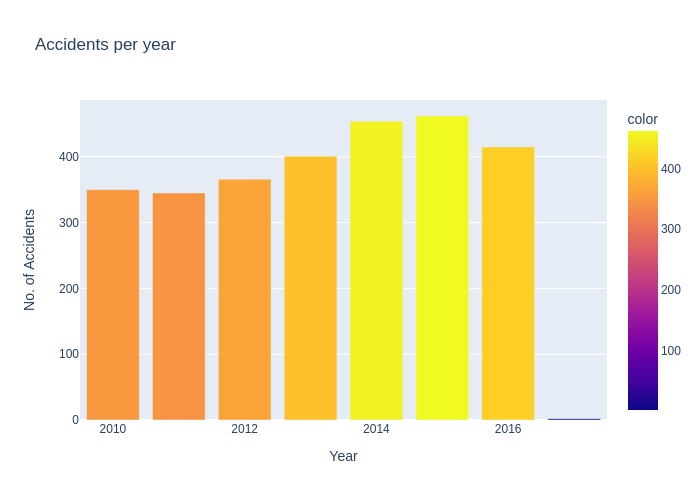

Conclusion: Over the year number of accidents in particular year has remain constant and there has been slight increase. 2017 is an exception due to data availability Constrains


In [27]:
x = data['Accident Year'].value_counts()
fig = go.Figure(px.bar(x, color = x , title='Accidents per year', labels = {"index":"Year","value":"No. of Accidents"}))
fig.show("png")

print("Conclusion: Over the year number of accidents in particular year has remain constant and there has been slight increase. 2017 is an exception due to data availability Constrains")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

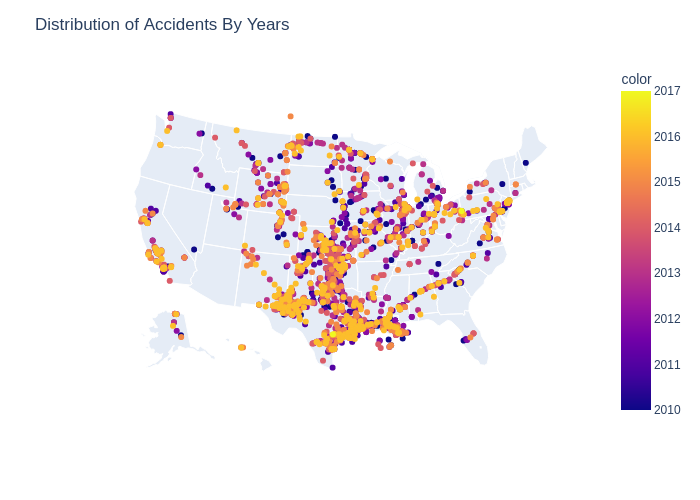

In southern part more number of accidents occured in recent days


In [28]:
import plotly.io as pio
x = data['Cause Category'].value_counts()
fig = go.Figure(px.scatter_geo(
        lon = data['Accident Longitude'],
        lat = data['Accident Latitude'],
        color = data['Accident Year'],
        ))

fig.update_layout(
        title = 'Distribution of Accidents By Years',
        geo_scope='usa',
        
    )
fig.show("png")

print('In southern part more number of accidents occured in recent days')

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

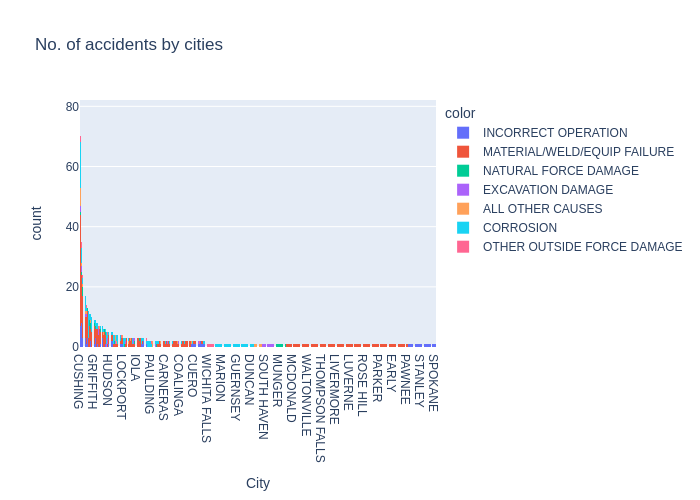

Most numbers of accidents have occurred in Cushing over the past 8 years followed by Pasadena and Houston. The major cause of accidents is found to be equipment failure.


In [29]:
fig = go.Figure(px.histogram( data['Accident City'], color = data['Cause Category'] , title = "No. of accidents by cities", labels = {"value":"City", "count":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("Most numbers of accidents have occurred in Cushing over the past 8 years followed by Pasadena and Houston. The major cause of accidents is found to be equipment failure.")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

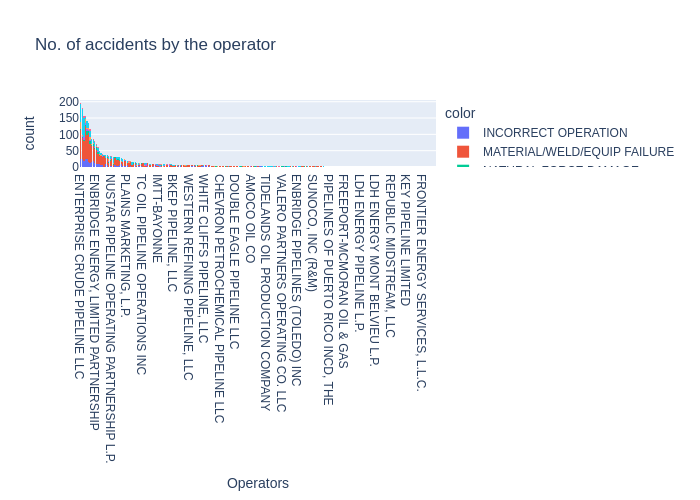

Most accident occurrences where reported from ENTERPRISE CRUDE PIPELINE LLC and major reason remains to be equipments failure


In [30]:
fig = go.Figure(px.histogram( data['Operator Name'], color = data['Cause Category'] , title = "No. of accidents by the operator", labels = {"value":"Operators", "count":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("Most accident occurrences where reported from ENTERPRISE CRUDE PIPELINE LLC and major reason remains to be equipments failure")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

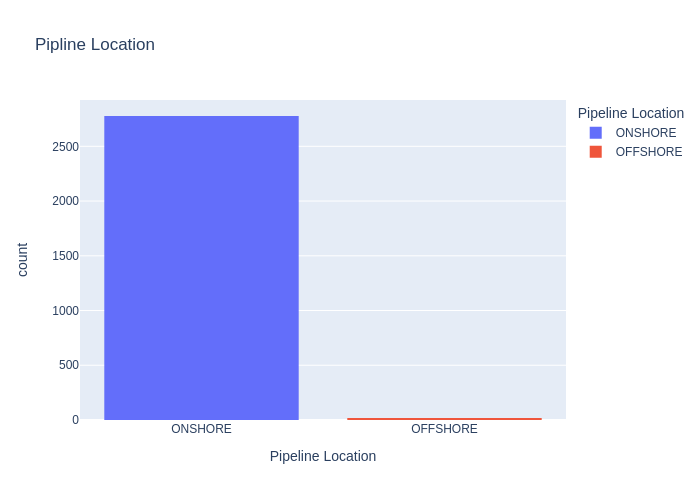

Most of the accidents occurred on Onshore


In [31]:
fig = px.histogram(data , x="Pipeline Location", color = "Pipeline Location", title = "Pipline Location" )
fig.show("png")

print("Most of the accidents occurred on Onshore")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

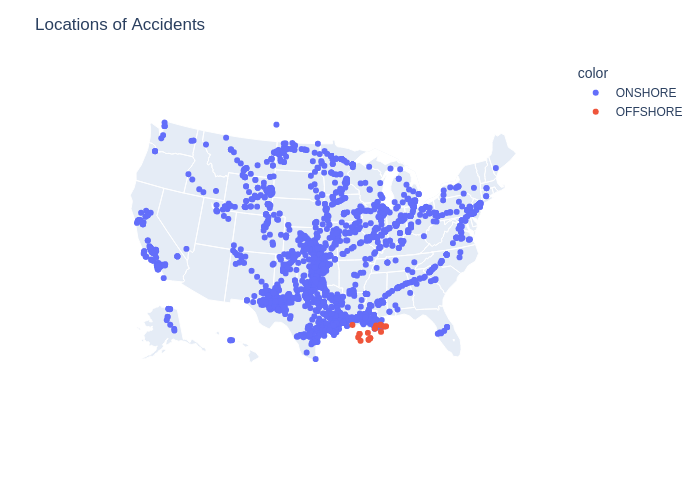

Most of the accidents occurred in the southern part of the USA. Nearly all offshore accidents have occurred near the Texas.


In [32]:
x = data['Cause Category'].value_counts()
fig = go.Figure(px.scatter_geo(
        lon = data['Accident Longitude'],
        lat = data['Accident Latitude'],
        color = data['Pipeline Location'],
        ))

fig.update_layout(
        title = 'Locations of Accidents',
        geo_scope='usa',
        
    )
fig.show("png")

print("Most of the accidents occurred in the southern part of the USA. Nearly all offshore accidents have occurred near the Texas.")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

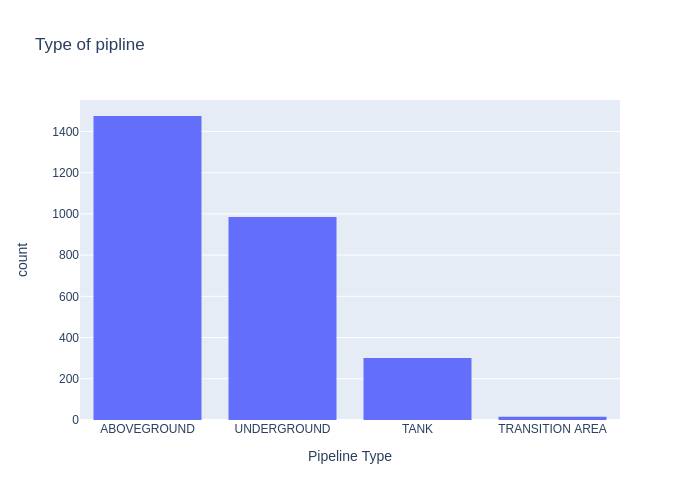

Almost in all the  accidents pipeline type has been Aboveground or Underground


In [33]:
fig = go.Figure(px.histogram(x = data['Pipeline Type'], title='Type of pipline', labels = {"x":"Pipeline Type", "count":"No. of piplines"} ))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("Almost in all the  accidents pipeline type has been Aboveground or Underground")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

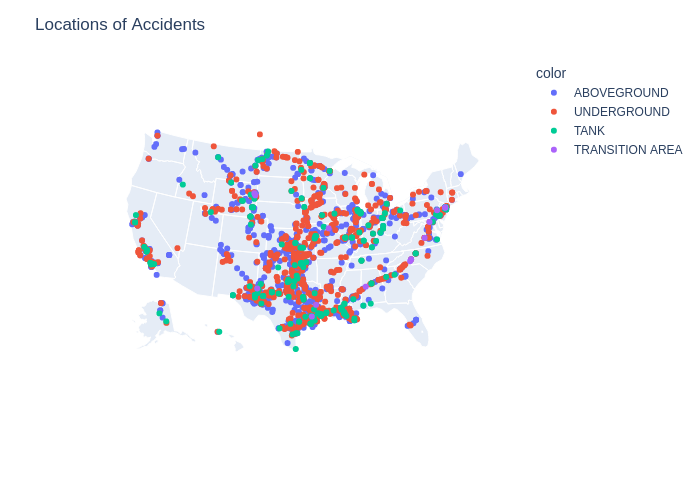

In [34]:
df1 = data[["Accident Longitude","Accident Latitude","Pipeline Type"]]
df1 = df1.dropna()

fig = go.Figure(px.scatter_geo(
        lon = df1['Accident Longitude'],
        lat = df1['Accident Latitude'],
        color = df1['Pipeline Type'],
        ))

fig.update_layout(
        title = 'Locations of Accidents',
        geo_scope='usa',
        
    )
fig.show("png")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

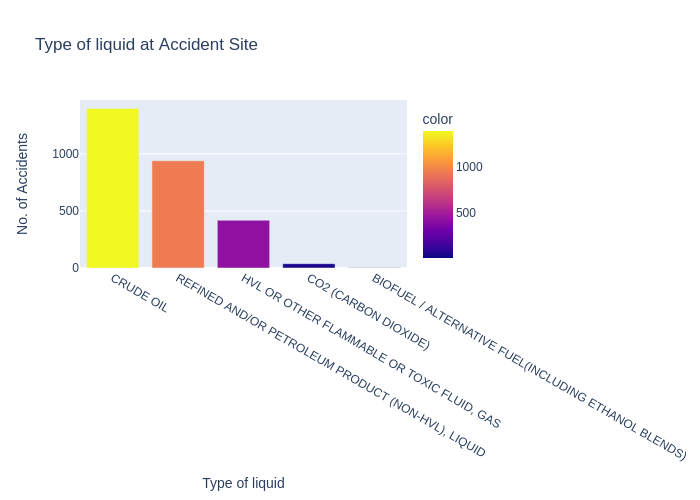

In most of the scenario when the accident occurred Liquid product was found like CRUDE OIL and Refined Petroleum Product at the accident site. Send a message to everyone


In [35]:
x = data['Liquid Type'].value_counts()
fig = go.Figure(px.bar(x, color = x , title = "Type of liquid at Accident Site", labels = {"index":"Type of liquid", "value":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("In most of the scenario when the accident occurred Liquid product was found like CRUDE OIL and Refined Petroleum Product at the accident site. Send a message to everyone")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

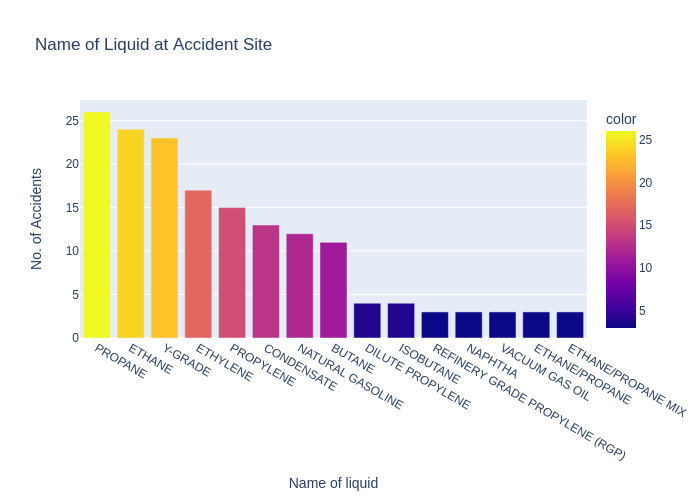

In most the cases propane, ethane were majorly release during accidents


In [36]:
x = data['Liquid Name'].value_counts()
x = x[:15]
fig = go.Figure(px.bar(x, color = x , title = 'Name of Liquid at Accident Site', labels = {"index":"Name of liquid", "value":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("In most the cases propane, ethane were majorly release during accidents")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

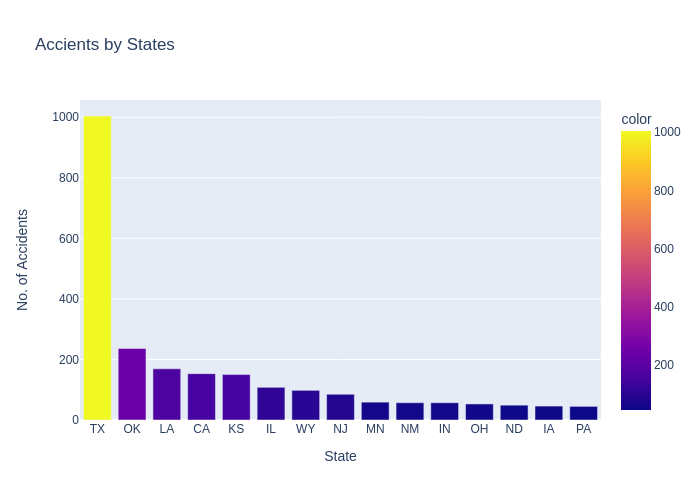

From this graph, we can conclude that in most of the cases accidents occurred in Texas state.


In [37]:
x = data['Accident State'].value_counts()
x = x[:15]
fig = go.Figure(px.bar(x, color = x, title = "Accients by States", labels = {"index":"State", "value":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("From this graph, we can conclude that in most of the cases accidents occurred in Texas state.")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

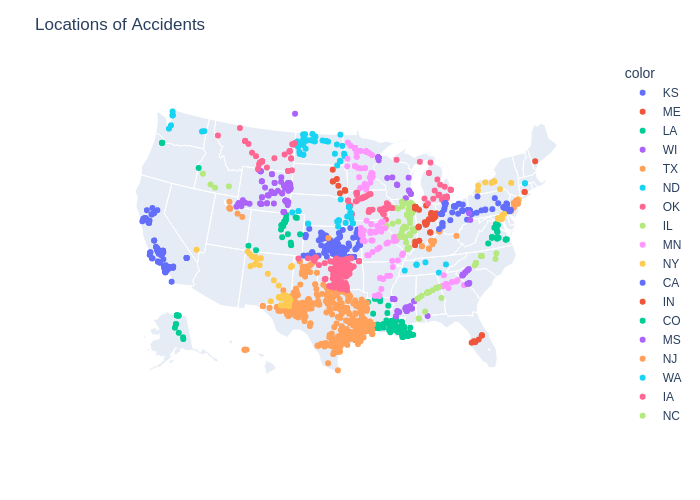

From this graph we can visualise that the most of the accidents occured in Texas State


In [38]:
df1 = data[["Accident Longitude","Accident Latitude","Accident State"]]
df1 = df1.dropna()

fig = go.Figure(px.scatter_geo(
        lon = df1['Accident Longitude'],
        lat = df1['Accident Latitude'],
        color = df1['Accident State'],
        ))

fig.update_layout(
        title = 'Locations of Accidents',
        geo_scope='usa',
        
    )
fig.show("png")

print("From this graph we can visualise that the most of the accidents occured in Texas State")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

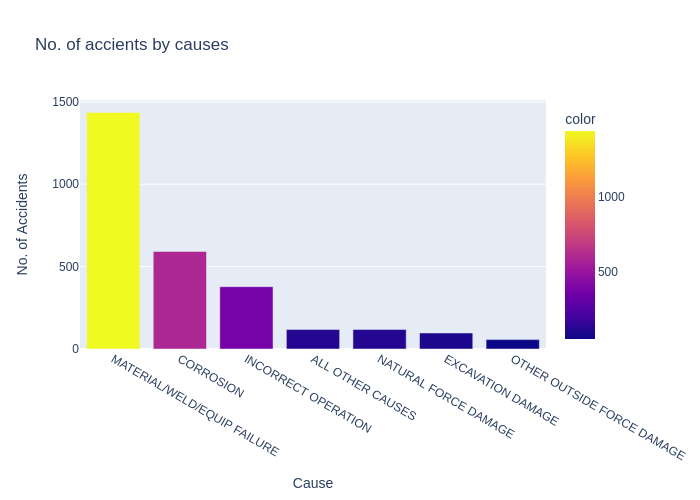

The major cause of accident is material or equipment failure, followed by corrosion 


In [39]:
x = data['Cause Category'].value_counts()
x = x[:15]
fig = go.Figure(px.bar(x, color = x, title = 'No. of accients by causes', labels = {"index":"Cause", "value":"No. of Accidents"}))
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show("png")

print("The major cause of accident is material or equipment failure, followed by corrosion ")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

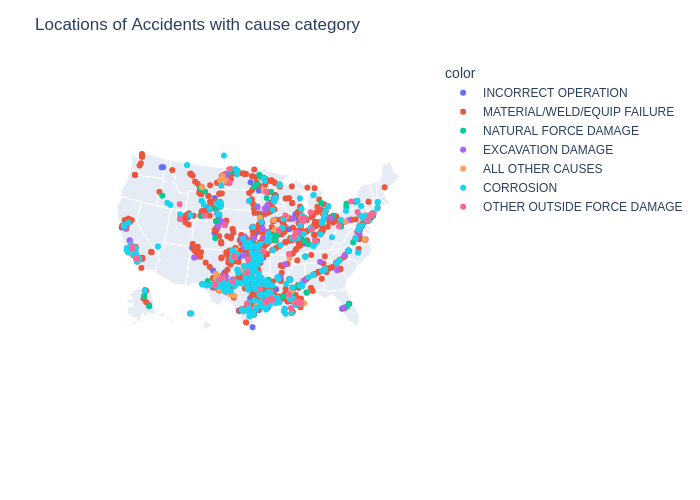

In [40]:
fig = go.Figure(px.scatter_geo(
        lon = data['Accident Longitude'],
        lat = data['Accident Latitude'],
        color = data['Cause Category'],
        ))

fig.update_layout(
        title = 'Locations of Accidents with cause category',
        geo_scope='usa',
        
    )
fig.show("png")


with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

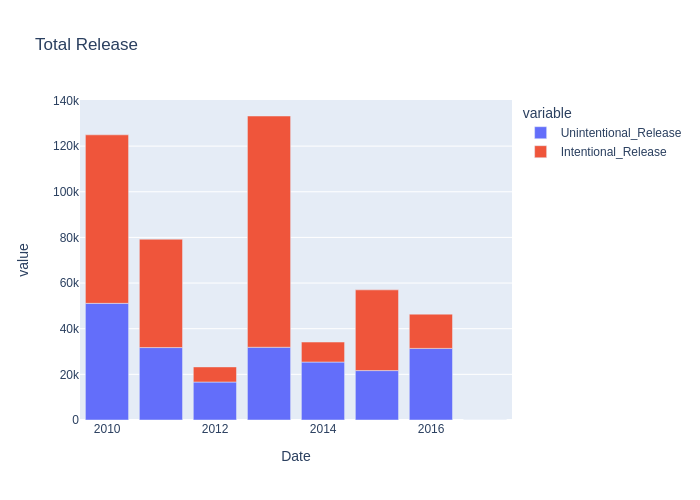

In [41]:
Unintentional_Release = np.array(data['Liquid Recovery (Barrels)'].resample("Y").sum())
Intentional_Release = np.array(data['Intentional Release (Barrels)'].resample("Y").sum())

Yearly_Release = pd.DataFrame(pd.date_range(start = "2009-12-31", periods = len(Intentional_Release), freq = "Y"))

Yearly_Release["Unintentional_Release"] = Unintentional_Release
Yearly_Release["Intentional_Release"] = Intentional_Release

Yearly_Release.rename(columns = {0:'Date'}, inplace = True)

fig = px.bar(Yearly_Release, x = 'Date', y = ["Unintentional_Release","Intentional_Release"], title='Total Release')
fig.show("png")

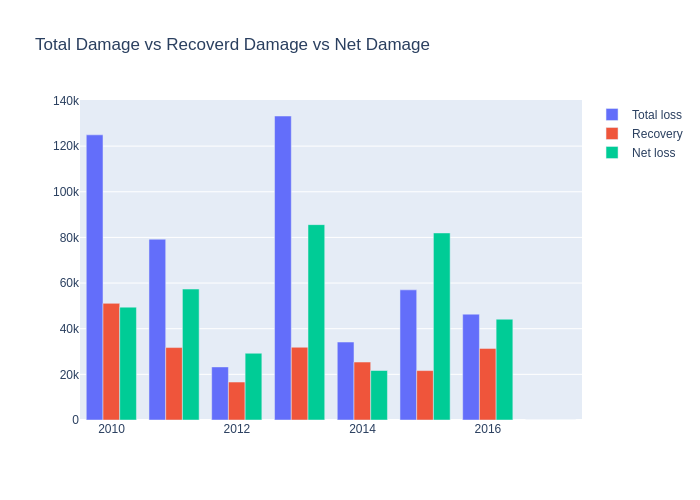

In [42]:
Unintentional_Release = np.array(data['Liquid Recovery (Barrels)'].resample("Y").sum())
Intentional_Release = np.array(data['Intentional Release (Barrels)'].resample("Y").sum())


Yearly_Release = pd.DataFrame(pd.date_range(start = "2009-12-31", periods = len(Intentional_Release), freq = "Y"))

Yearly_Release["Unintentional_Release"] = Unintentional_Release
Yearly_Release["Intentional_Release"] = Intentional_Release

Yearly_Release.rename(columns = {0:'Date'}, inplace = True)

Liquid_Recovery = np.array(data['Liquid Recovery (Barrels)'].resample("Y").sum())
Net_Loss = np.array(data['Net Loss (Barrels)'].resample("Y").sum())
Total_loss = np.array(Yearly_Release["Unintentional_Release"] + Yearly_Release["Intentional_Release"])

Date = pd.date_range(start = "2009-12-31", periods = len(Intentional_Release), freq = "Y")

fig = go.Figure(data=[
    go.Bar(name='Total loss', x=Date, y=Total_loss),
    go.Bar(name='Recovery', x=Date, y=Liquid_Recovery),
    go.Bar(name='Net loss', x=Date, y=Net_Loss)
])

fig.update_layout(barmode='group', title = "Total Damage vs Recoverd Damage vs Net Damage")
fig.show("png")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

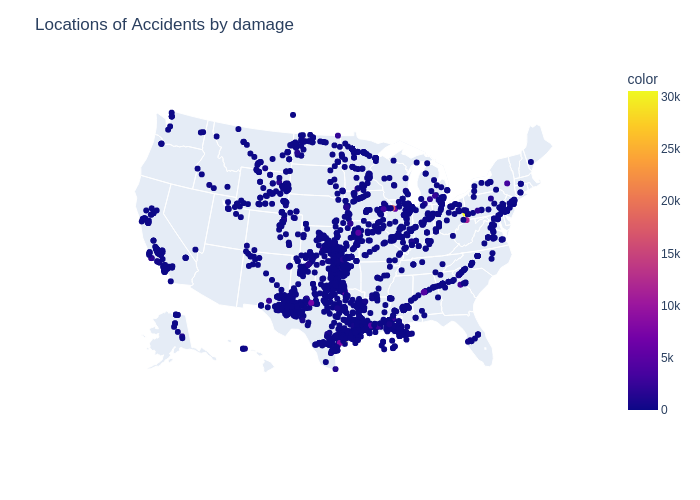

In [43]:
df1 = data[["Accident Longitude","Accident Latitude","Net Loss (Barrels)"]]
df1 = df1.dropna()

fig = go.Figure(px.scatter_geo(
        lon = df1['Accident Longitude'],
        lat = df1['Accident Latitude'],
        color = df1['Net Loss (Barrels)'],
        ))

fig.update_layout(
        title = 'Locations of Accidents by damage',
        geo_scope='usa',
        
    )
fig.show("png")

with open('/content/index.html', 'a') as f:
    f.write(fig.to_html(full_html=False, include_plotlyjs='cdn'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



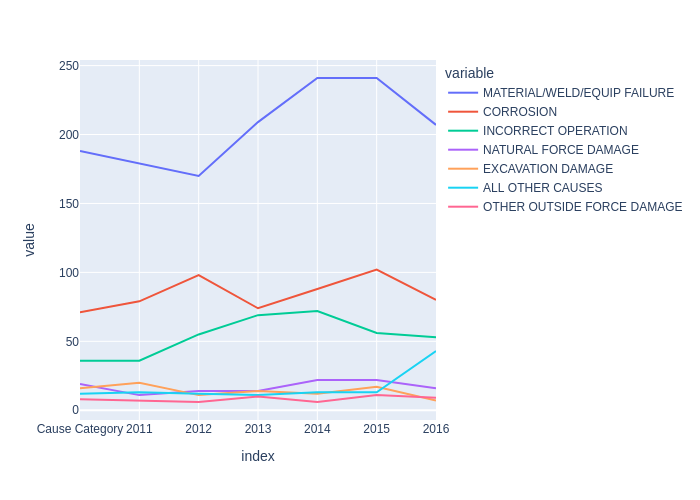

In [44]:
df = pd.DataFrame(data['2010']["Cause Category"].value_counts())
for i in range(1,7):
  df['201'+str(i)] = data['201'+str(i)]["Cause Category"].value_counts()

fig = px.line(df.T)
fig.show("png")